## Fashion MNIST 이미지 분류 - CNN

In [2]:
# ref: https://www.tensorflow.org/tutorials/keras/classification?hl=ko

#### 모듈 import

In [3]:
import sys 
import os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
# seed 고정
np.random.seed(121)
tf.random.set_seed(121)

### 데이터셋 불러오기

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
print(train_images.shape) # 0에서 255 사이의 값을 갖는 28X28 크기의 numpy array
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
print(train_labels.shape) # 0에서 9까지의 정수 값을 갖는 array
print(test_labels.shape)

(60000,)
(10000,)


In [8]:
print(train_labels[:10])
print(test_labels[:10])

[9 0 0 3 0 2 7 2 5 5]
[9 2 1 1 6 1 4 6 5 7]


In [9]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [10]:
NUM_CLASSES__ = len(set(train_labels))
NUM_CLASSES__

10

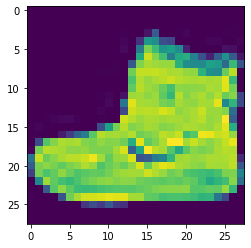

In [11]:
plt.imshow(train_images[0])

In [12]:
LABEL_NAME__ = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']

#### 공통 함수

In [13]:
def myPlot(fit_res) :
    key_ = list(fit_res.history.keys())
    plt.figure(figsize=(12,5))
    for i in range(len(key_)):
        plt.plot(fit_res.history[key_[i]], label=key_[i])
    plt.title("metrics")
    plt.xlabel("epoch")
    plt.ylabel("score")
    plt.legend()
    plt.show()

In [14]:
def myscore(X,y,fit_res=None):
    # test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
    # print(f"loss: {test_loss:.5f} accuracy: {test_acc:.5f}" )
    history = model.evaluate(X,  y, verbose=1)
    print(f"loss: {history[0]:.5f} accuracy: {history[1]:.5f}" )
    if fit_res != None:
        myPlot(fit_res)
# myscore(test_images,  test_labels, fit_res)

In [16]:
def mypredit_check(test_X, idx=0):
    pred = model.predict(test_X)
    print(pred[idx])
    pred_label = np.argmax(pred[idx])
    print(pred_label, LABEL_NAME__[pred_label])
    plt.imshow(test_X[idx])
    plt.show()

#### visualization sample image

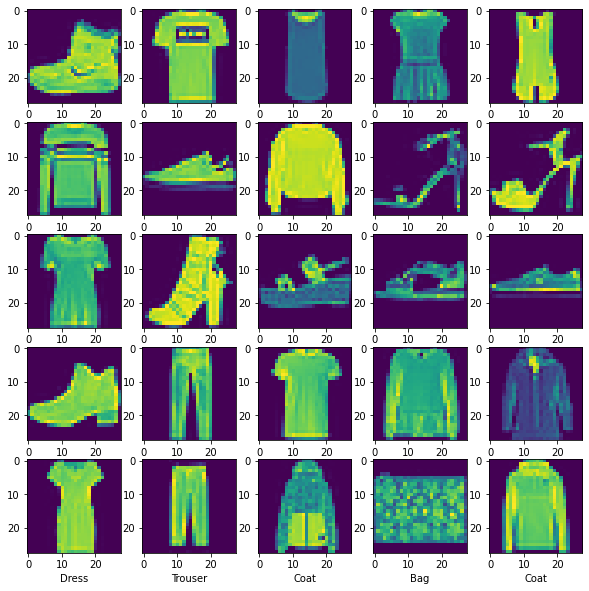

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(LABEL_NAME__[train_labels[i]])
plt.show()

### 데이터 전처리

- #### 정규화

In [18]:
# 0에서 255사이의 값을 갖는 훈련/테스트 데이터들을 0.0~1.0 사이의 값을 갖도록 변환
train_images, test_images = train_images / 255.0, test_images / 255.0

- #### reshape

In [19]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
print(train_images.shape, len(train_labels), train_labels[:5])
print(test_images.shape, len(test_labels), test_labels[:5])

(60000, 28, 28, 1) 60000 [9 0 0 3 0]
(10000, 28, 28, 1) 10000 [9 2 1 1 6]


- #### Encoding

In [20]:
# 원-핫 인코딩 1차원 -> 2차원
train_labels_cate = to_categorical(train_labels, NUM_CLASSES__)
test_labels_cate = to_categorical(test_labels, NUM_CLASSES__)

print(train_labels_cate.shape)
print(train_labels_cate[:5])

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### CNN Model build & Fit

In [21]:
input_shape = (28, 28, 1) # (width, height, channel 수)
model = Sequential( [
            Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, activation="relu"),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, kernel_size=(3, 3), activation="relu"),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dense(128, activation="relu"),
            Dropout(0.5),
            Dense(NUM_CLASSES__, activation="softmax")
            ] )

# OneHotEncoding을 안했을 시 loss = spase_categorical_crossentropy
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [22]:
# 모델 저장 폴더
if not os.path.exists("./model"):
    os.mkdir('./model')

filepath = "./model/{epoch:02d}{val_loss:.3f}.h5"

checkpnt = ModelCheckpoint(filepath, monitor="val_loss", save_best_only=True)
estop = EarlyStopping(monitor="val_loss", patience=4)

In [23]:
fit_res = model.fit(train_images, train_labels_cate, callbacks=[checkpnt, estop], batch_size=128, validation_split=0.1, epochs=10)

Epoch 1/10
422/422 [==============================] - 39s 90ms/step - loss: 0.9795 - accuracy: 0.6568 - val_loss: 0.4121 - val_accuracy: 0.8490
Epoch 2/10
422/422 [==============================] - 40s 95ms/step - loss: 0.4589 - accuracy: 0.8365 - val_loss: 0.3471 - val_accuracy: 0.8660 - loss: 0.4592 - accura
Epoch 3/10
422/422 [==============================] - 38s 90ms/step - loss: 0.3795 - accuracy: 0.8618 - val_loss: 0.3159 - val_accuracy: 0.8810
Epoch 4/10
422/422 [==============================] - 37s 87ms/step - loss: 0.3454 - accuracy: 0.8766 - val_loss: 0.3022 - val_accuracy: 0.8833
Epoch 5/10
422/422 [==============================] - 35s 84ms/step - loss: 0.3213 - accuracy: 0.8821 - val_loss: 0.2856 - val_accuracy: 0.8953
Epoch 6/10
422/422 [==============================] - 34s 81ms/step - loss: 0.2992 - accuracy: 0.8924 - val_loss: 0.2791 - val_accuracy: 0.8948
Epoch 7/10
422/422 [==============================] - 34s 80ms/step - loss: 0.2909 - accuracy: 0.8947 - val_loss

313/313 [==============================] - 2s 7ms/step - loss: 0.2697 - accuracy: 0.9029
loss: 0.26968 accuracy: 0.90290


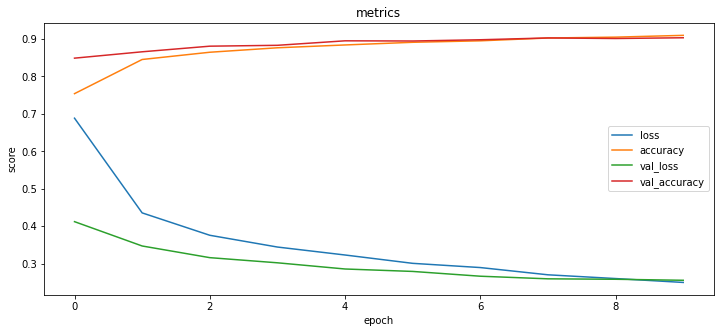

In [24]:
myscore(test_images,  test_labels_cate, fit_res)

### 예측 모델 서비스

#### 1) 임의의 test_images로 테스트

In [25]:
img = (np.expand_dims(test_images[0], 0)) # expand_dims는 axis로 지정된 차원을 추가
img.shape

(1, 28, 28, 1)

[1.8471943e-10 4.3079141e-11 8.8240720e-11 2.5037614e-11 2.0447181e-12
 2.6790515e-04 1.1215388e-10 2.9766685e-04 2.6449809e-09 9.9943441e-01]
9 Ankel boot


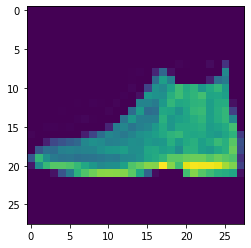

In [26]:
mypredit_check(test_images, idx=0)

#### 2) 파일 업로드하여 예측

In [27]:
import ipywidgets as widgets
myupload = widgets.FileUpload(
    accept= '.png', 
    multiple=True  
)
myupload

FileUpload(value={}, accept='.png', description='Upload', multiple=True)

['test_sneaker_3.png']
(28, 28, 1)
(1, 28, 28, 1)
[9.0410303e-08 4.3735493e-08 4.7739483e-08 1.1723345e-08 8.8046076e-10
 1.6639211e-03 5.5455931e-08 2.6340664e-03 5.0076403e-07 9.9570125e-01]
9 Ankel boot


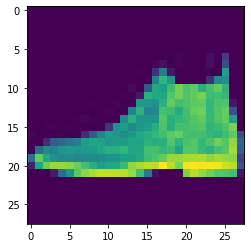

In [28]:

from PIL import Image  
import io

uploaded_filename = list(myupload.value)
print(uploaded_filename)

for i, fname in enumerate(uploaded_filename):
    content = myupload.value[uploaded_filename[i]]['content']
    upload_img = Image.open(io.BytesIO(content)).resize((28, 28))   
    plt.imshow(upload_img)
    
    upload_img = np.array(upload_img)[:, :, 1].reshape(28,28,1) / 255.0
    print(upload_img.shape)
    upload_img = (np.expand_dims(upload_img,0))
    print(upload_img.shape)
    mypredit_check(upload_img)